In [1]:
import pandas as pd
from sklearn.decomposition import PCA, SparsePCA
import seaborn as sns
from sklearn.cluster import KMeans

In [71]:
pca_cols = [
'survey_fatigue', 
'survey_mood', 
'survey_readiness', 
'survey_sleep_quality', 
'survey_soreness', 
'survey_stress', 
'weight', 
'glasses_of_fluid',
'laminutes', 
'maminutes', 
'vaminutes', 
'sedminutes', 
'resthr', 
'sleep_duration', 
'minutes_to_fall_asleep', 
'minutes_asleep', 
'minutes_woken_up', 
'minutes_after_wakeup', 
'time_in_bed', 
'overall_score', 
'composition_score', 
'revitalization_score', 
'duration_score', 
'restlessness', 
'hr_max', 
'hr_min', 
'hr_mean', 
'hr_median', 
'hr_std', 
'total_calories', 
'total_distance', 
'total_steps',
'deep_sleep_count', 
'deep_sleep_minutes',
'wake_sleep_count', 
'wake_sleep_minutes',
'light_sleep_count', 
'light_sleep_minutes', 
'rem_sleep_count', 
'rem_sleep_minutes', 
]

test_cols = [
'survey_fatigue', 
'survey_mood', 
'survey_readiness', 
'survey_sleep_quality', 
'survey_soreness', 
'survey_stress', 
'laminutes', 
'maminutes', 
'vaminutes', 
'sedminutes', 
'resthr', 
'sleep_duration', 
'minutes_to_fall_asleep', 
'minutes_asleep', 
'minutes_woken_up', 
'minutes_after_wakeup', 
'time_in_bed', 
'overall_score', 
'composition_score', 
'revitalization_score', 
'duration_score', 
'restlessness', 
'hr_max', 
'hr_min', 
'hr_mean', 
'hr_median', 
'hr_std', 
'total_calories', 
'total_distance', 
'total_steps',
'deep_sleep_count', 
'deep_sleep_minutes',
'wake_sleep_count', 
'wake_sleep_minutes',
'light_sleep_count', 
'light_sleep_minutes', 
'rem_sleep_count', 
'rem_sleep_minutes',   
]

In [83]:
df = pd.read_csv('../dataset/clean/day_data_gold_v3_test.csv', header=0)

In [85]:
df[test_cols+['pid', 'date', 'day_of_week']].dropna(how='all', axis=0).dropna(thresh=len(test_cols)-4, axis=0).to_csv('sample_date.csv', index=False)

In [5]:
pca = PCA(n_components=2)

In [6]:
df_clean = df[test_cols+['pid']].dropna()

In [7]:
df_trans = pca.fit_transform(df_clean[test_cols])

<AxesSubplot:>

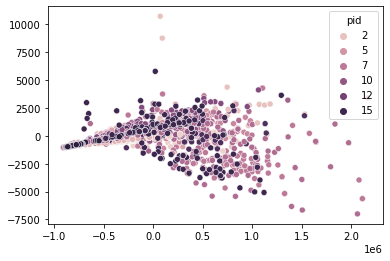

In [8]:
sns.scatterplot(x=df_trans[:,0], y=df_trans[:,1], hue=df_clean['pid'])

In [64]:
spca = SparsePCA(n_components=6)

In [65]:
df_sparse = spca.fit_transform(df[test_cols].fillna(0))

In [67]:
sns.pairplot(data=df, hue='pid')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026CF5258F70> (for post_execute):


KeyboardInterrupt: 

In [33]:
n_clusters=5

In [34]:
km = KMeans(n_clusters=n_clusters).fit(df_sparse)

In [35]:
membership = km.predict(df_sparse)

C:\Users\jason\anaconda3\envs\aggies4health\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

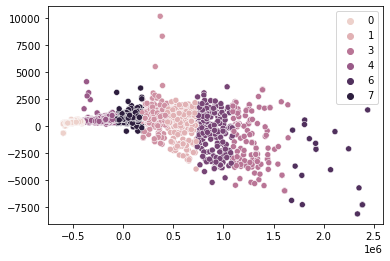

In [36]:
sns.scatterplot(df_sparse[:, 0], df_sparse[:, 1], hue=membership)

In [37]:
buddies = {pid: {i:0 for i in range(n_clusters)} for pid in range(1,17)}
for m, pid in zip(membership, df['pid']):
    buddies[pid][m] += 1
groups = [[] for _ in range(n_clusters)]
for key, value in buddies.items():
    groups[max(value, key=value.get)].append(key)
print(groups)

[[2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 16], [6, 15], [1], [7], [], [8], [], []]
